About this Notebook:
    
In this notebook, we lwill create an example of usage of our class data from data.py

In [39]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import seaborn as sns
%matplotlib inline
from  matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text',usetex=True)
from data import DATA

In [40]:
list = {"1000.xlsx"}
hermes = DATA({"1000.xlsx"})
hermes.data.head()

,Ebeam,F2,Q2,col,hadron,i,obs,pT,stat_u,systabs_u,systrel,target,value,x,y,z
0,27.6,0.0,1.249727,hermes,pi+,0,M,0.110571,0.057592,0.350294,0,proton,4.398481,0.037588,0.641938,0.152202
1,27.6,0.0,1.249727,hermes,pi+,1,M,0.221793,0.071953,0.314397,0,proton,8.759948,0.037588,0.641938,0.154622
2,27.6,0.0,1.249727,hermes,pi+,2,M,0.327693,0.070699,0.589268,0,proton,9.660459,0.037588,0.641938,0.156095
3,27.6,0.0,1.249727,hermes,pi+,3,M,0.440991,0.070982,0.582032,0,proton,7.843414,0.037588,0.641938,0.159801
4,27.6,0.0,1.249727,hermes,pi+,4,M,0.581764,0.059171,0.319916,0,proton,4.778433,0.037588,0.641938,0.162489


### Data Exploration
Lets first have a descriptive exploration on our data.

In [41]:
# summarize the data
print(hermes.data.shape)
hermes.data.describe()

(336, 16)


,Ebeam,F2,Q2,i,pT,stat_u,systabs_u,systrel,value,x,y,z
count,3.360000e+02,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.0,336.000000,336.000000,336.000000,336.000000
mean,2.760000e+01,0.204071,3.651750,167.500000,0.452837,0.054746,0.103230,0.0,1.479156,0.168427,0.447247,0.440650
std,1.743426e-13,0.153238,2.825850,97.139076,0.271372,0.100441,0.185631,0.0,1.978512,0.129208,0.095502,0.232444
min,2.760000e+01,0.000000,1.249727,0.000000,0.088250,0.000694,0.000472,0.0,0.009875,0.037588,0.364756,0.140849
25%,2.760000e+01,0.000000,1.509975,83.750000,0.204620,0.008299,0.009872,0.0,0.153451,0.061098,0.367180,0.270416
50%,2.760000e+01,0.259810,2.349426,167.500000,0.399775,0.023448,0.038451,0.0,0.629335,0.123975,0.416321,0.389609
75%,2.760000e+01,0.348100,5.241270,251.250000,0.682349,0.058344,0.089368,0.0,2.040372,0.253881,0.477175,0.579171
max,2.760000e+01,0.356730,9.218269,335.000000,1.188888,0.913224,1.286004,0.0,9.660459,0.410056,0.641938,0.904286


Lets select some features to explore more.

In [42]:
cdf = hermes.data[['pT','x','y','z','Q2','value']]
cdf.head(3)

,pT,x,y,z,Q2,value
0,0.110571,0.037588,0.641938,0.152202,1.249727,4.398481
1,0.221793,0.037588,0.641938,0.154622,1.249727,8.759948
2,0.327693,0.037588,0.641938,0.156095,1.249727,9.660459


we can plot each of these fearues:

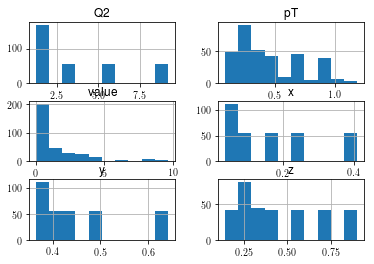

In [43]:
cdf.hist()
plt.show()

Now, lets plot some of these features vs the value, to see how linear is their relation:

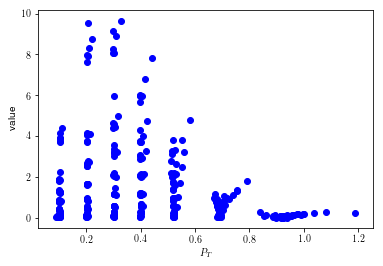

In [44]:
plt.scatter(cdf.pT, cdf.value,  color='blue')
plt.xlabel(r'$P_{T}$')
plt.ylabel('value')
plt.show()

Now, lets see unique values of Q2

In [45]:
hermes.data['Q2'].unique()

array([1.249727, 1.509975, 1.820673, 1.823411, 2.87544 , 5.24127 ,
       5.244379, 9.213259, 9.218269, 9.21275 ])

In [49]:
hermes.data['z'].unique()

array([0.1522018, 0.154622 , 0.1560952, 0.159801 , 0.1624893, 0.1678483,
       0.1928145, 0.2295056, 0.2340181, 0.2356541, 0.2376523, 0.241739 ,
       0.2479694, 0.2632606, 0.277677 , 0.2836573, 0.284629 , 0.2877546,
       0.2907836, 0.2974947, 0.3072802, 0.3362224, 0.3423433, 0.3437677,
       0.3460258, 0.3496685, 0.3548945, 0.360385 , 0.4218557, 0.4256206,
       0.4297563, 0.4297738, 0.4325416, 0.4359502, 0.4414493, 0.5334359,
       0.5370032, 0.5377358, 0.5421495, 0.5419208, 0.5442552, 0.5456988,
       0.6918871, 0.6945797, 0.6895546, 0.6884266, 0.6875906, 0.6888948,
       0.6915313, 0.8865441, 0.8832255, 0.8754233, 0.869965 , 0.8655884,
       0.8600547, 0.8724795, 0.1439628, 0.1461407, 0.1486257, 0.1511631,
       0.1539638, 0.160855 , 0.1631639, 0.2244163, 0.2253329, 0.2268693,
       0.2293571, 0.2306755, 0.2357579, 0.2448666, 0.2744124, 0.2757215,
       0.2769695, 0.2782737, 0.2799357, 0.2843332, 0.2938136, 0.3339281,
       0.3360587, 0.3356573, 0.3387938, 0.3402057, 

Let us use SEABORN (SNS)
The bivariate distribution plots help us to study the relationship between two variables by analyzing the scatter plot, and we use the pairplot() function of the seaborn package to plot the bivariate distributions:

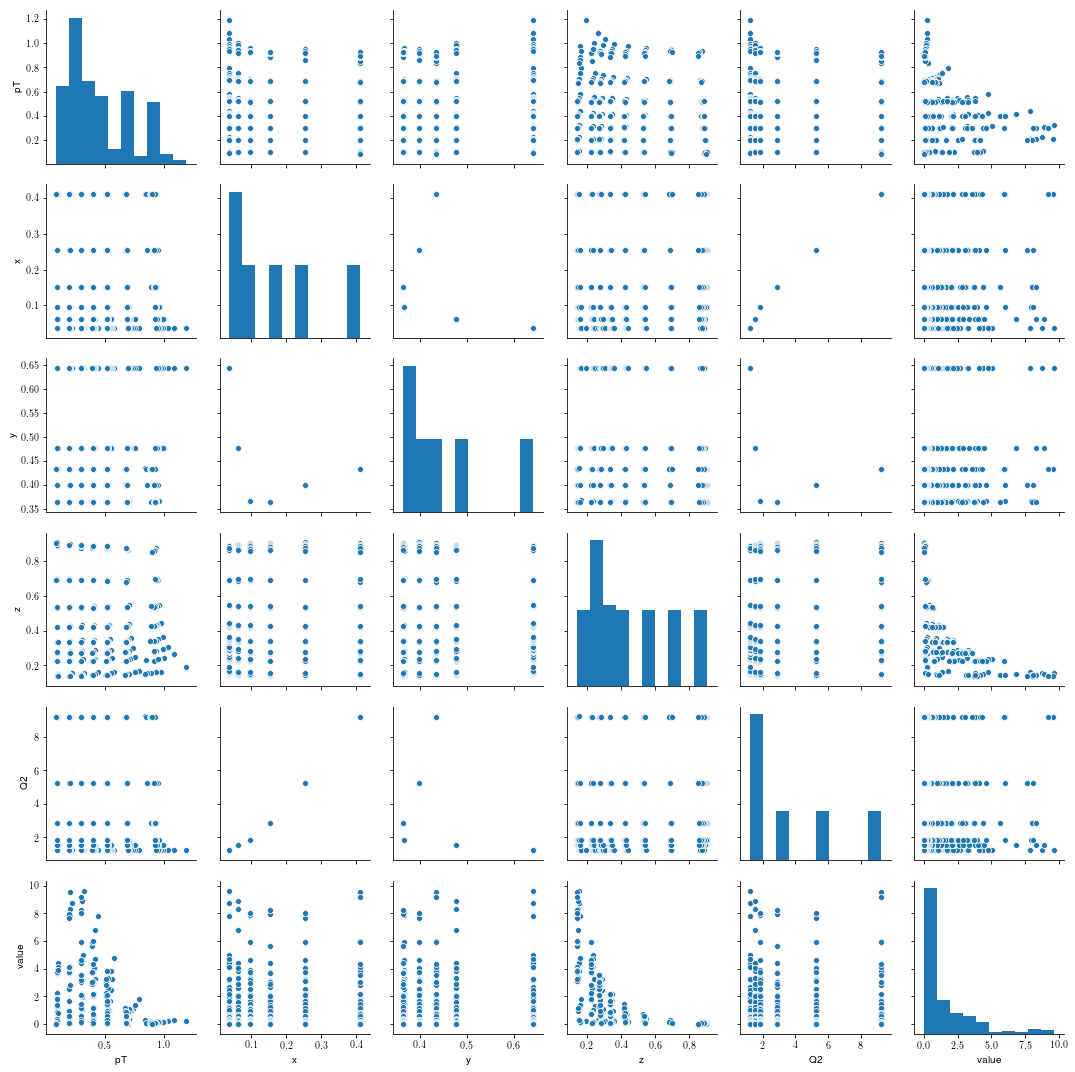

In [46]:
sns.pairplot(cdf)

A correlation matrix is a table showing the value of the correlation coefficient (Correlation coefficients are used in statistics to measure how strong a relationship is between two variables. ) between sets of variables. Each attribute of the dataset is compared with the other attributes to find out the correlation coefficient. This analysis allows you to see which pairs have the highest correlation, the pairs which are highly correlated represent the same variance of the dataset thus we can further analyze them to understand which attribute among the pairs are most significant for building the model.

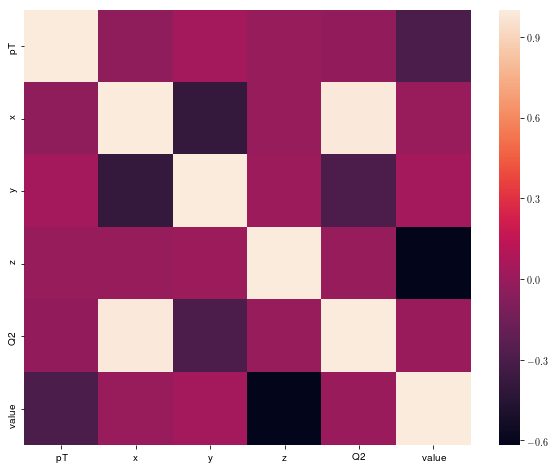

In [53]:
f, ax = plt.subplots(figsize=(10, 8))
corr = cdf.corr()
sns.heatmap(corr,
            xticklabels=cdf.columns.values,
            yticklabels=cdf.columns.values)